In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [67]:
#Cargar archivo
df = pd.read_csv('walmart-sales.csv')
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [68]:
#Checking Dataset Description
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [69]:
# Convertir la columna 'Date' a datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
df = df.groupby(df.index).sum() # Sumamos los valores de los índices duplicados
df = df.sort_index() # Ordenamos los índices
de = df.asfreq('D') # Ajustamos la frecuencia

In [70]:
# Se selecciona la serie de tiempo
timeseries = df['Weekly_Sales']

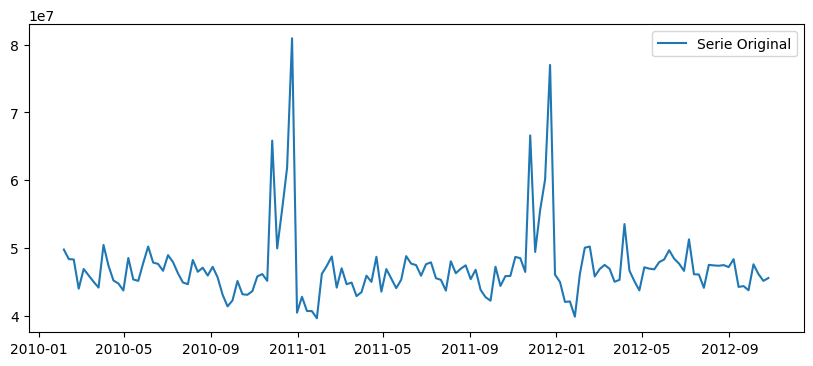

In [71]:
# Grafica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(timeseries, label='Serie Original')
plt.legend()

plt.show()

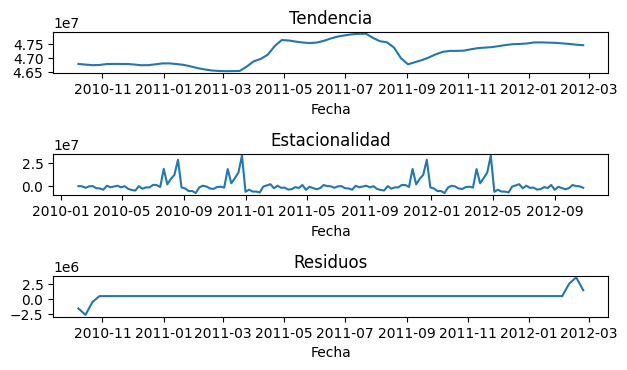

In [73]:
descomposition = seasonal_decompose(timeseries, model='additive', period=70)

# Gráfica de la descomposición

#Gráfica de la tendencia
plt.subplot(412)
plt.plot(descomposition.trend, label='Tendencia')
plt.title('Tendencia')
plt.xlabel('Fecha')

#Gráfica de la estacionalidad
plt.subplot(413)
plt.plot(descomposition.seasonal, label='Estacionalidad')
plt.title('Estacionalidad')
plt.xlabel('Fecha')

#Gráfica de los residuos
plt.subplot(414)
plt.plot(descomposition.resid, label='Residuos')
plt.title('Residuos')
plt.xlabel('Fecha')

plt.tight_layout()
plt.show()